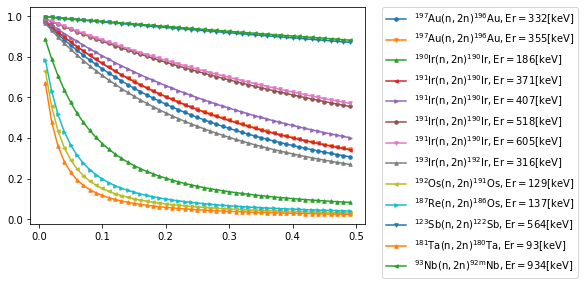

In [56]:
import numpy as np
import matplotlib.pyplot as plt

foil= ["$\mathrm{^{197}Au(n,2n)^{196}Au,Er=332 [keV]}$","$\mathrm{^{197}Au(n,2n)^{196}Au,Er=355 [keV]}$","$\mathrm{^{190}Ir(n,2n)^{190}Ir,Er=186 [keV]}$","$\mathrm{^{191}Ir(n,2n)^{190}Ir,Er=371 [keV]}$","$\mathrm{^{191}Ir(n,2n)^{190}Ir,Er=407 [keV]}$",\
       "$\mathrm{^{191}Ir(n,2n)^{190}Ir,Er=518 [keV]}$","$\mathrm{^{191}Ir(n,2n)^{190}Ir,Er=605 [keV]}$","$\mathrm{^{193}Ir(n,2n)^{192}Ir,Er=316 [keV]}$","$\mathrm{^{192}Os(n,2n)^{191}Os,Er=129 [keV]}$","$\mathrm{^{187}Re(n,2n)^{186}Os,Er=137 [keV]}$",\
       "$\mathrm{^{123}Sb(n,2n)^{122}Sb,Er=564 [keV]}$","$\mathrm{^{181}Ta(n,2n)^{180}Ta,Er=93 [keV]}$","$\mathrm{^{93}Nb(n,2n)^{92m}Nb,Er=934 [keV]}$"]
attenuation = [0.328,0.287,1.096,0.248,0.202,0.12,0.114,0.328,2.92,2.39,0.086,5.12,0.061]
density = [19.32,19.32,22.42,22.42,22.42,22.42,22.42,22.42,22.57,21.02,6.691,16.654,8.57]
# cross_section = 
markers1 = ["o","v","^","<",">","o","v","^","<",">","v","^","<",">","o","v","^","<",">"]
self_shield = []
x = []

for i in range(1,50):
    x.append(i/100)

for i in range(len(foil)):
    self_shield_per_foil = []
    for ii in range(1,50):
        self_shield_per_foil.append((1-np.exp(-attenuation[i]*density[i]*ii/100))/(attenuation[i]*density[i]*ii/100))
        
    self_shield.append(self_shield_per_foil)
    plt.plot(x,self_shield_per_foil,label = foil[i],marker = markers1[i],markersize=3.5)
    

# plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.savefig("self_shield.png", format="png", dpi=300,bbox_inches="tight")
plt.show()
    
    

    
        

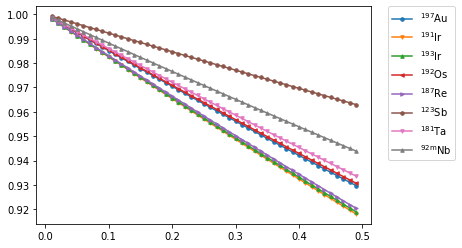

In [60]:
foil = ["$\mathrm{^{197}Au}$","$\mathrm{^{191}Ir}$","$\mathrm{^{193}Ir}$","$\mathrm{^{192}Os}$","$\mathrm{^{187}Re}$","$\mathrm{^{123}Sb}$","$\mathrm{^{181}Ta}$","$\mathrm{^{92m}Nb}$"]
cross_section = [5.1,5.008,5.003,4.1919,5.075,4.733,5.12,4.29]
atomic_mass = [197,191,193,192,187,123,181,93]
density = [19.32,22.42,22.42,22.57,21.02,6.691,16.654,8.57]

for i in range(len(foil)):
    self_abs_per_foil = []
    for ii in range(1,50):
        self_abs_per_foil.append((1-np.exp(-density[i]*cross_section[i]*10**(-24)/atomic_mass[i]*6.02*10**23*ii/100))/(density[i]*cross_section[i]*10**(-24)/atomic_mass[i]*6.02*10**23*ii/100))
        
    plt.plot(x,self_abs_per_foil,label = foil[i],marker = markers1[i],markersize=3.5)
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.savefig("neutronabs.png", format="png", dpi=300,bbox_inches="tight")
plt.show()

14892015.854861712
x1:52103995.50231622
x2:-52103995.50231622


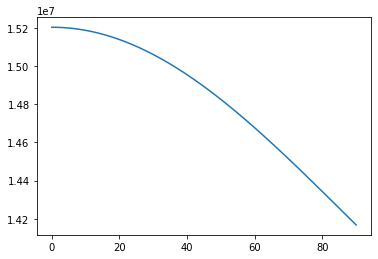

In [247]:
# solving a quadratic equation
import numpy as np
import math

def solv_quadratic_equation(a, b, c):
    """ 2次方程式を解く  """
    D = (b**2 - 4*a*c) ** (1/2)
    x_1 = (-b + D) / (2 * a)
    x_2 = (-b - D) / (2 * a)

    return x_1, x_2

if __name__ == '__main__':
    E = []
    x = []
    Q = 17.6*10**6 #[eV]
    ace = 220*10**3 #[eV]
    mn = 1.67*10**(-27)
    ma = 6.68*10**(-27)
    md = 3.34*10**(-27)
    e = 1.6*10**(-19)
    vd = np.sqrt((2*ace*e)/(md))
    #cos = 1/np.sqrt(2)
    #cos = 0
    
    for i in range(91):
        cos = math.cos(math.radians(i))
        a = 1/2*mn+1/32*ma
        b = -1/8*ma*vd*cos
        c = 1/8*ma*vd**2-(Q+ace)*e
        x1, x2 = solv_quadratic_equation(float(a) , float(b) , float(c))
        x.append(i)
        E.append(1/2*mn*x1**2/e)
        if i == 45:
            print(1/2*mn*x1**2/e)
    plt.plot(x,E)
    print('x1:{}'.format(x1))
    print('x2:{}'.format(x2))


In [244]:
import numpy as np

class A:
    def __init__(self):
        D0 = self.make_array("D0")
        D = self.make_array("D")
        P = self.make_array("P")
        G = self.make_array("G")
        M = self.make_array("M")
        V = self.make_array("V")
        GM = np.dot(G,M)
        N = np.dot(GM,G.T)
        A = np.linalg.inv(N + V)
        MGt = np.dot(M,G.T)
        D0D = D0 - D
        MGtA = np.dot(MGt,A)
        Mab = M - np.dot(MGtA,GM)
        ab = np.dot(MGtA,D0D) + P
        print(ab)
        print(Mab)
        
    def make_array(self,x):

        line_list = []
        f=open("C:/Users/takeh/Desktop/"+x+".txt")
        line = f.readline()
        while line:
            line_list.append(line.split())
            line = f.readline()
        f.close
        y = np.zeros((len(line_list),len(line_list[1])))
        for i in range(len(line_list)):
            for ii in range(len(line_list[1])):
                y[i][ii] = line_list[i][ii]
        return y

if __name__ == "__main__":
    execute = A()


[[ 0.00590753]
 [-1.08993253]]
[[-6.90943484e-03  2.54109445e-04]
 [ 2.28791252e-05 -8.13342214e-06]]


In [232]:
import numpy as np
f = open("../Desktop/AOKI/AOKI.i")
line = f.readline()
bin_line = []
Energy_line = []
line_list = []
k = 0
while line:
    line_list.append(line)
    line1 = line.rstrip().split()
    if "SI" in line1[0] and line1[0] != "SI1":
        bin_line.append(k)
    if "SP" in line1[0]and line1[0] != "SP1":
        Energy_line.append(k)
    k = k + 1
    line = f.readline()
f.close




for i in range(len(bin_line)):
    print("--------")
    Energy = []
    Bin = []
    if i != len(bin_line)-1:
        for ii in range(bin_line[i],Energy_line[i]):
#             print(line_list[ii].split(" "))
            for iii in line_list[ii].split(" "):
                if "E" in iii:
                    Energy.append(iii)
        for ii in range(Energy_line[i],bin_line[i+1]):
#             print(line_list[ii].split(" "))
            for iii in line_list[ii].split(" "):
                if "." in iii:
                    Bin.append(iii)

    else:
        for ii in range(bin_line[i],Energy_line[i]):
            print(line_list[ii].split())
        for ii in range(Energy_line[i],Energy_line[i]+10):
            print(line_list[ii].split())
            

    print(Energy)
    print(Bin)
    for ii in range()
    


SyntaxError: invalid syntax (<ipython-input-232-7435ce5b738f>, line 47)

['1.txt', '2.txt', '3.txt']


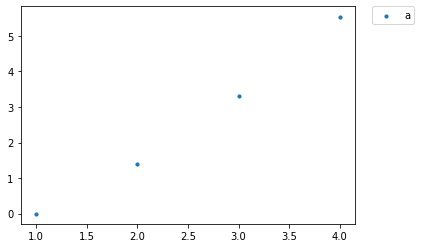

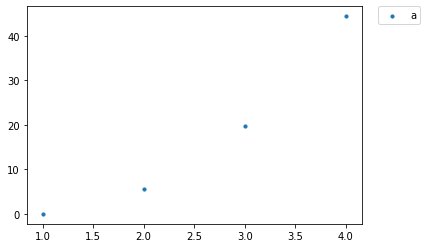

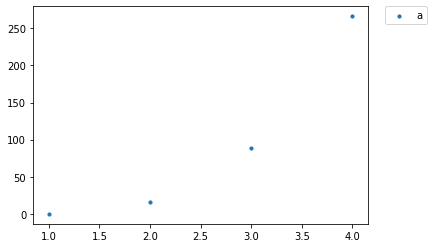

In [14]:
import matplotlib.pyplot as plt
import os
import numpy as np

files = os.listdir("../Desktop/data/")
print(files)

for i in files:
    
    xdata = []
    ydata = []

    f = open("../Desktop/data/"+i)
    line = f.readline()
    while line:
        line = line.rstrip()
        s = line.split(" ")
        xdata.append(float(s[0]))
        ydata.append(float(s[1])*np.log(float(s[1])))
    #     print(s[0],s[1])
        line = f.readline()
    f.close

    plt.scatter(xdata,ydata,label = "a",s =10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

    plt.show()

['262.3034643', '503.5425904', '725.4089549', '929.4582916', '1117.121401', '504.3855161', '968.2662411', '1394.894921', '1787.26309', '2148.122046', '727.805058', '1397.163569', '2012.769096', '2578.938283', '3099.641129', '934.0008141', '1792.996485', '2583.010317', '3309.581913', '3977.806015']
['526.8211459', '700.0798624', '757.0604583', '775.7999964', '781.9629766', '708.2969644', '941.2386827', '1017.847572', '1043.042381', '1051.328343', '770.8105384', '1024.311457', '1107.68177', '1135.100247', '1144.11752', '792.3447956', '1052.92781', '1138.627253', '1166.811724', '1176.080914']
['2778.964282', '5263.219689', '7484.020068', '9469.304797', '11244.05029', '5274.850927', '9990.304459', '14205.68463', '17974.02418', '21342.7317', '7516.495479', '14235.86739', '20242.65061', '25612.41509', '30412.7166', '9529.796168', '18048.95844', '25664.66443', '32472.7256', '38558.79258']
['307.9356367', '480.4111917', '577.0152009', '631.1233589', '661.4294797', '484.6274392', '756.0685346',

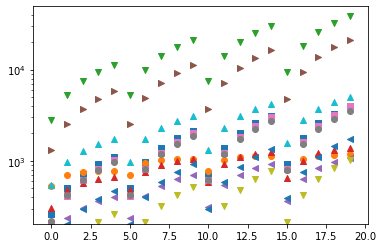

In [15]:
import numpy as np
import matplotlib.pyplot as plt
f = open('../reference/plot.txt')
line = f.readline()
bin_line = []
Energy_line = []
line_list = []
k = 0
while line:
    line1 = line.rstrip().split('\t')
    print(line1)
    line_list.append([float(k) for k in line1])
    line = f.readline()
f.close

markers1 = [",","o","v","^","<",">",",","o","v","^","<",">",",","o","v","^","<",">",",","o","v","^","<",">"]

ticks = []
q = 0
for ii in range(4):
    for iii in range(1,6):
        ticks.append(q)
        q = q + 1
                    
for i in range(len(line_list)):
    plt.scatter(ticks,line_list[i],marker = markers1[i])

plt.yscale('log')